In [2]:
import pandas as pd
housing_price_df = pd.DataFrame(
columns=['넓이(m^2)', '가격(억)'],
data=[
    [35, 10],
    [40, 12],
    [60, 20],
    [60, 20],
    [62, 24],
    [60, 22],
    [70, 28],
    [80, 32],
    [48, 15],
    [60, 23]
    ])
housing_price_df.head(5)

,넓이(m^2),가격(억)
0,35,10
1,40,12
2,60,20
3,60,20
4,62,24


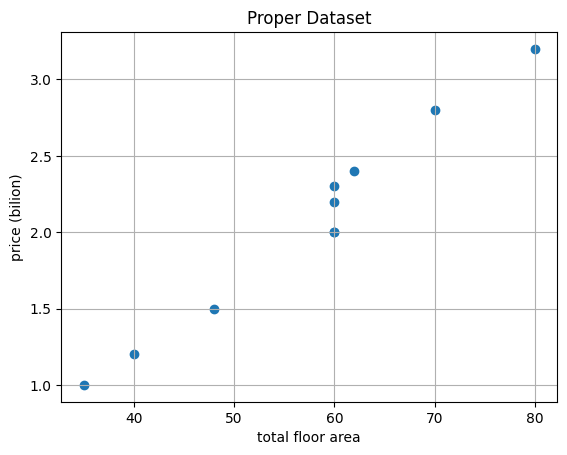

In [4]:
from matplotlib import pyplot as plt

def draw_housing_graph(data, boundary, title):
    """
    집의 넓이-가격 데이터를 그래프로 표시하는 함수입니다.
    :param data: 표시할 데이터프레임
    :param boundary: 데이터 클래스를 구분하는 선
    """
    fig = plt.figure()
    plt.scatter(data['넓이(m^2)'], data['가격(억)'] / 10)
    plt.plot(*boundary)
    plt.title(title)
    plt.xlabel('total floor area')
    plt.ylabel('price (bilion)')
    plt.grid(True)
    plt.show()
    plt.close()
draw_housing_graph(housing_price_df, (), title='Proper Dataset')

In [17]:
#collapse-hide
def get_weight_bias(a1, a2):
    x1, y1 = a1
    x2, y2 = a2
    
    w = (y2 - y1) / (x2 - x1) # 기울기
    b = y1 - (w * x1) # Y 절편
    return w, b

def draw_housing_graph_with_sample(data, title, sample):
    """
    집의 넓이-가격 데이터를 그래프로 표시하는 함수입니다.

    :param data: 표시할 데이터프레임
    :param boundary: 데이터 클래스를 구분하는 선
    """

    plt.scatter(data['넓이(m^2)'], data['가격(억)'] / 10)
    a1 = (data['넓이(m^2)'].min(), data['가격(억)'].min() / 10) # 최소점
    a2 = (data['넓이(m^2)'].max(), data['가격(억)'].max() / 10) # 최대점
    plt.plot([a1[0], a2[0]], [a1[1], a2[1]])

    w, b = get_weight_bias(a1, a2)
    w, b = round(w, 3), round(b, 3) # 반올림
    
    predict = w * sample['넓이(m^2)'] + b
    plt.scatter(sample['넓이(m^2)'], predict)
        
    plt.title(title)
    plt.xlabel('total floor area')
    plt.ylabel('price (bilion)')
    plt.grid(True)
    plt.show()
    plt.close()
    
    print('예상 가격은 {} (억)입니다.'.format(predict * 10))
    print('찾아낸 직선의 방정식 : y = {w}x + {b}'.format(w=w, b=b))

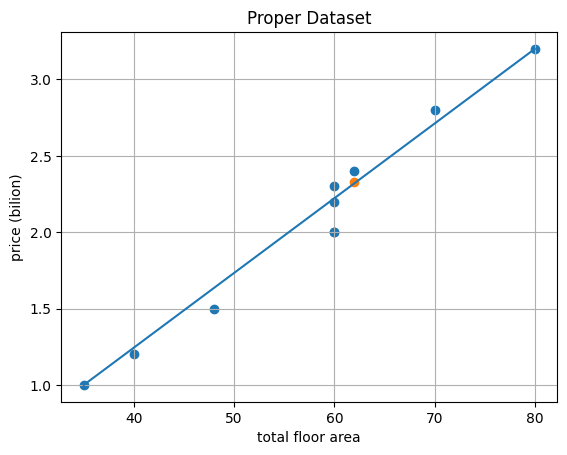

예상 가격은 23.270000000000003 (억)입니다.
찾아낸 직선의 방정식 : y = 0.049x + -0.711


In [18]:
sample = {'넓이(m^2)':62} # 예측용 데이터, 아직 가격을 모름

draw_housing_graph_with_sample(housing_price_df, title='Proper Dataset', sample=sample)

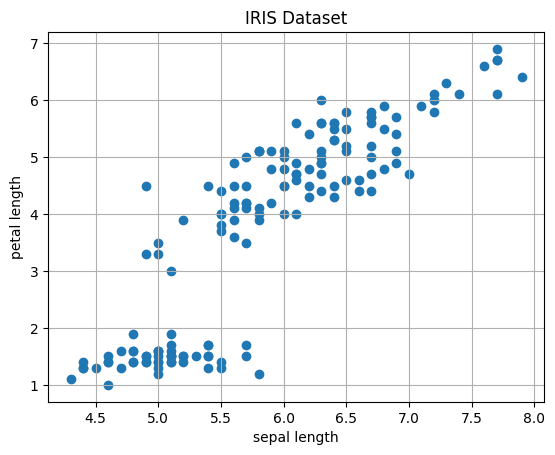

In [9]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
data, target = iris_dataset['data'], iris_dataset['target']

plt.scatter(data[:,0], data[:,2])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('IRIS Dataset')
plt.grid(True)
plt.show()
plt.close()

In [10]:
from sklearn.cluster import KMeans
import numpy as np


dataset = np.column_stack([data[:, 0], data[:, 2]])


def cluster(K):
    model = KMeans(n_clusters=K)
    model.fit(dataset)
    
    for i in range(K):        
        plt.scatter(dataset[model.labels_ == i, 0], dataset[model.labels_ == i, 1])

    plt.xlabel('sepal length')
    plt.ylabel('petal length')
    plt.title('IRIS Dataset (Clustering, K={})'.format(K))
    plt.grid(True)
    plt.show()
    plt.close()


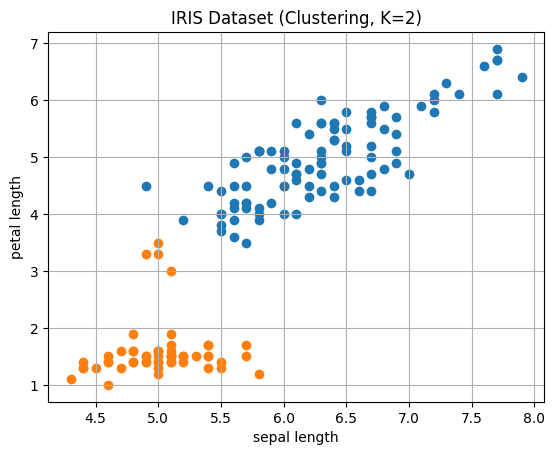

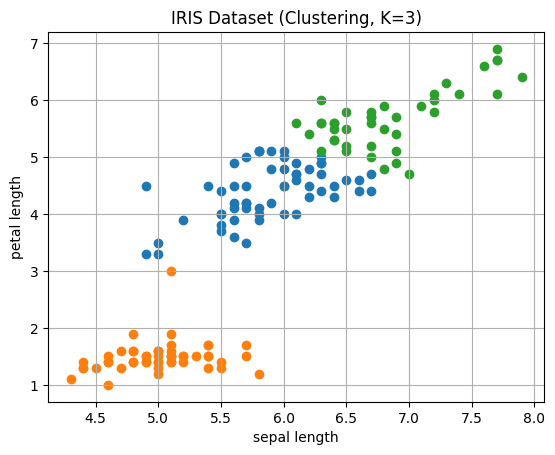

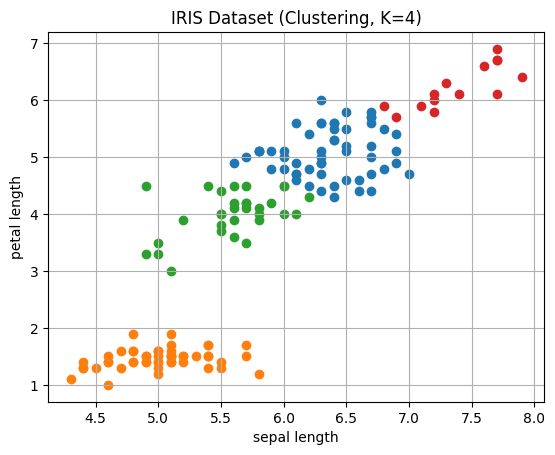

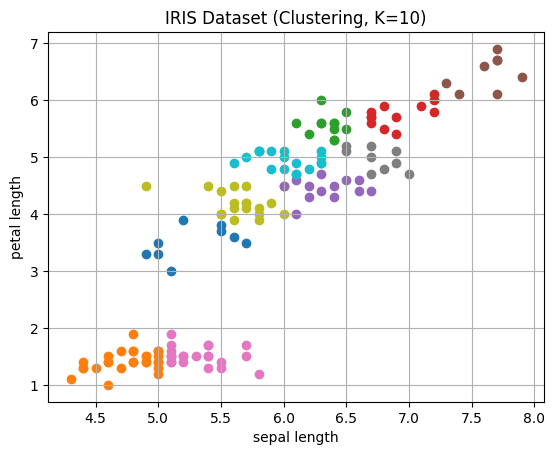

In [11]:
cluster(K=2)

cluster(K=3)

cluster(K=4)

cluster(K=10)

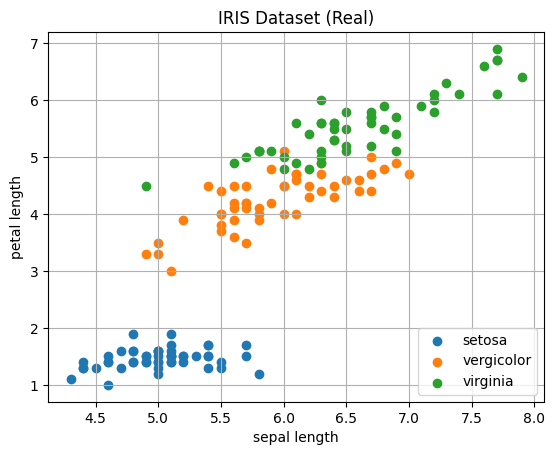

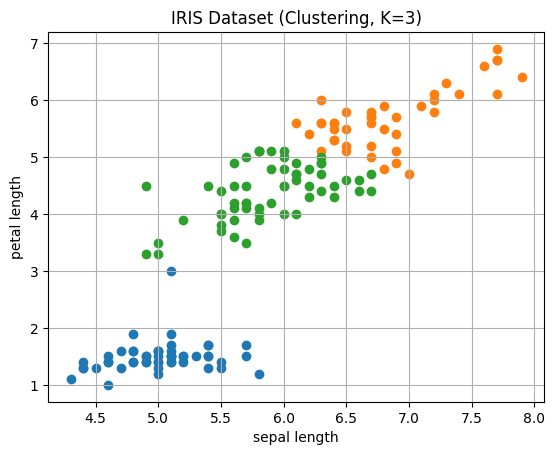

In [12]:
#collapse-hide
dataset = np.column_stack([data[:, 0], data[:, 2]])

plt.scatter(dataset[target == 0, 0], dataset[target == 0, 1], label='setosa')
plt.scatter(dataset[target == 1, 0], dataset[target == 1, 1], label='vergicolor')
plt.scatter(dataset[target == 2, 0], dataset[target == 2, 1], label='virginia')

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('IRIS Dataset (Real)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
plt.close()

# 3개의 군집으로 군집화
cluster(K=3)
